# Тема “Обучение с учителем”

### Задание 1

Импортируйте библиотеки pandas и numpy.

In [2]:
import numpy as np
import pandas as pd

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [3]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [19]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [23]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [24]:
X = reduce_mem_usage(X)
X.info()

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03 MB
Decreased by 49.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


<font color='red'>Уменьшили объем памяти в 2 раза.</font>

<font color='red'>Поскольку данные (значения независимых параметров) имеют большой разброс, масштабируем их</font>

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287910,-0.272599,-0.144218,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867882,-0.987329,-0.303095,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867882,-0.987329,-0.303095,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026502


In [26]:
y = pd.DataFrame(boston["target"], columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [25]:
y = reduce_mem_usage(y)
y.info()

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 48.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float32
dtypes: float32(1)
memory usage: 2.1 KB


<font color='red'>Уменьшили объем памяти в 2 раза.</font>

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [72]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred = lr.predict(X_test).flatten()

y_pred.shape

(152,)

In [74]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred,
})

check_test.head(10)

,y_test,y_pred
173,0.116151,0.665667
274,1.073920,1.519610
491,-0.972224,-0.775097
72,0.029081,0.312408
452,-0.700130,-0.400253
76,-0.275664,0.066814
316,-0.515107,-0.559498
140,-0.928689,-0.920133
471,-0.319199,0.054868
500,-0.623944,-0.210423


In [109]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(check_test["y_pred"], check_test["y_test"])
print(MSE)

0.25488698700189916


In [110]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(check_test["y_pred"], check_test["y_test"])
print(MAE)

0.3442214085362022


Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(check_test["y_test"], check_test["y_pred"])
print ( 'Коэффициент детерминации R2 равен', round(r2, 2))

Коэффициент детерминации R2 равен 0.71


<font color='red'>Интерпретация результата. 71% изменчивости зависимого выходного атрибута можно объяснить моделью, в то время как остальные 29% изменчивости все еще не учтены.
R2 указывает долю точек данных, которые лежат в пределах линии, созданной уравнением регрессии. Желательно более высокое значение R 2, поскольку оно указывает на лучшие результаты.
Значение не такое высокое, поэтому желательно более детальное исследование и отбор параметров, возможно их нормализация, а также применение других моделей, который дадут более точные прогнозы.</font>

### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [98]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [99]:
y_pred_1 = model.predict(X_test)

In [105]:
check_test_1 = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_1,
})

check_test_1.head(10)

,y_test,y_pred
173,0.116151,0.034319
274,1.073920,0.940625
491,-0.972224,-0.681834
72,0.029081,0.138847
452,-0.700130,-0.581773
76,-0.275664,-0.082084
316,-0.515107,-0.296075
140,-0.928689,-0.845787
471,-0.319199,-0.141287
500,-0.623944,-0.171968


In [111]:
MSE_1 = mean_squared_error(check_test_1["y_pred"], check_test_1["y_test"])
print(MSE_1)

0.11044222355280293


In [112]:
MAE_1 = mean_absolute_error(check_test_1["y_pred"], check_test_1["y_test"])
print(MAE_1)

0.22631146888991924


In [113]:
r2_1 = r2_score(check_test_1["y_test"], check_test_1["y_pred"])
print ( 'Коэффициент детерминации R2_1 равен', round(r2_1, 2))

Коэффициент детерминации R2_1 равен 0.87


Напишите в комментариях к коду, какая модель в данном случае работает лучше.

<font color='red'>Интерпретация результата. Регрессионная модель случайного леса дает более высокий R2, то есть имеет более высокую точность. То есть она более предпочтительна для предсказания. Об этом же свидетельсвует более низкие значения средней квадратической и средней абсолютной ошибок</font>

### *Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

In [117]:
?RandomForestRegressor

In [118]:
?RandomForestRegressor.feature_importances_

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [120]:
imp = model.feature_importances_
print(imp)

[0.03013406 0.00155197 0.00741736 0.00102962 0.01393405 0.40387331
 0.01470799 0.06526503 0.00403742 0.01142913 0.01820099 0.01266206
 0.41575702]


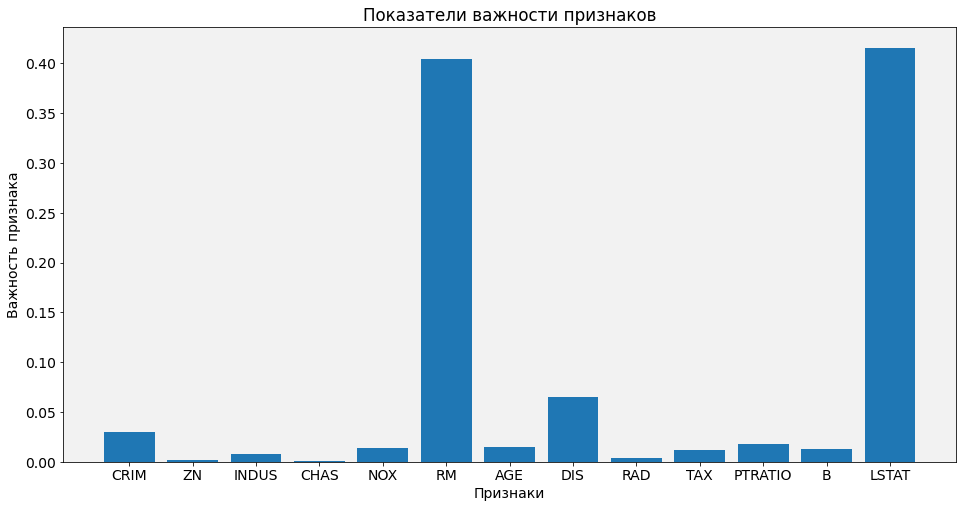

In [238]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})  # размер шрифта на графиках

fig, ax = plt.subplots()

ax.bar(boston['feature_names'], imp)

ax.set_facecolor('#f2f2f2')
fig.set_figwidth(16)    #  ширина
fig.set_figheight(8)    #  высота
plt.title("Показатели важности признаков")
plt.xlabel("Признаки")
plt.ylabel("Важность признака")
plt.show()

In [143]:
# Два самых важных признака видны и на графике, но сделаем определение автоматическим

ind = boston['feature_names']

imp_series = pd.Series(imp, index=ind)

imp_series_sort = imp_series.sort_values(ascending=False)

print(f"Два самых важных признака:\n{imp_series_sort[:2]}")

Два самых важных признака:
LSTAT    0.415757
RM       0.403873
dtype: float64


### *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Загрузите датасет creditcard.csv и создайте датафрейм df.

In [169]:
df = pd.read_csv("creditcard.csv", sep=",")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

In [170]:
df["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<font color="red">Частота корректных транзакций намного выше частоты мошеннических, поэтому целевая переменная несбалансирована</font>

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<font color="red">Все столбцы содержат числовые данные. В них нет пропусков</font>

In [172]:
df = reduce_mem_usage(df)
df.info()

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 32.87 MB
Decreased by 51.2%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-nul

<font color="red">Уменьшили в два раза объем памяти</font>

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.

In [161]:
pd.options.display.max_columns = 100

Просмотрите первые 10 строк датафрейма df.

In [175]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686132,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.199997,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


Создайте датафрейм X из датафрейма df, исключив столбец Class.

In [177]:
X = df.drop(["Class"], axis=1, inplace=False)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

Создайте объект Series под названием y из столбца Class.

In [179]:
y = pd.Series(df['Class'])

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

print(f"X_train.shape = {X_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (199364, 30)
X_test.shape = (85443, 30)
y_train.shape = (199364,)
y_test.shape = (85443,)


Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [185]:
parameters = [{
    'n_estimators': [10, 15], 
    'max_features': np.arange(3, 5), 
    'max_depth': np.arange(4, 7)
              }]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.


In [186]:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [187]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

Просмотрите параметры лучшей модели с помощью атрибута best_params_.


In [188]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

<font color="red">Соответственно, лучше построить модель под этими параметрами</font>

In [196]:
clf_1 = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15)
clf_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

In [221]:
y_pred_proba_test = clf_1.predict_proba(X_test)

print(y_pred_proba_test[:10])

[[9.99555128e-01 4.44872416e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]
 [9.99676744e-01 3.23255971e-04]]


Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

In [222]:
y_pred_proba_test = y_pred_proba_test[:, 1]

print(y_pred_proba_test[:5])

[0.00044487 0.00032326 0.00032326 0.00032326 0.00032326]


Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [223]:
y_pred_proba_train = clf_1.predict_proba(X_train)
y_pred_proba_train = y_pred_proba_train[:, 1]
print(y_pred_proba_train[:5])

[0.00032326 0.00032326 0.00032326 0.00032326 0.00032326]


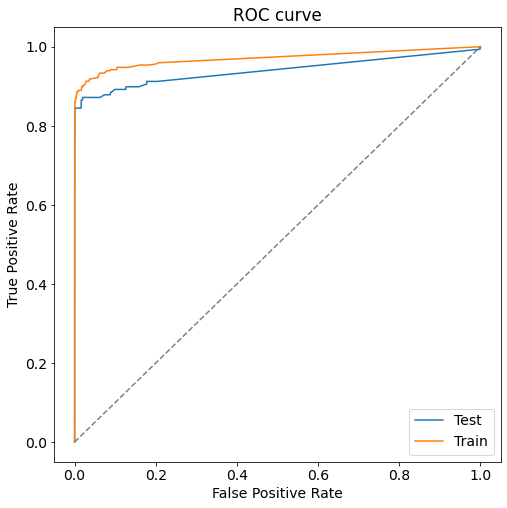

In [239]:
from sklearn.metrics import roc_curve

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test, pos_label=1)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train, pos_label=1)

plt.rcParams['figure.figsize'] = 8, 8

plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train)
plt.legend(labels=["Test", "Train"], loc="lower right")

plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

In [230]:
from sklearn.metrics import roc_auc_score

roc_auc_score_test = roc_auc_score(y_test, y_pred_proba_test)
roc_auc_score_test

0.9392194498267539

In [231]:
roc_auc_score_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_score_train

0.9705894566515461

<font color="red">Вывод: модель классификации очень точна, но на обучающей выборке точность классификации выше, так как значение параметрам AUC больше</font>

### *Дополнительные задания:

1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [234]:
from sklearn.datasets import load_wine
data = load_wine()

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [233]:
type(data)

sklearn.utils.Bunch

In [235]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [266]:
data['data'][:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [271]:
data['data'].shape

(178, 13)

<font color="red">Данные состоят из 178 строк и 13 параметров (столбцов)</font>

In [273]:
# Названия параметров
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [274]:
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [275]:
print(f"Целевая переменная содержит {data['target_names'].size} класса (ов)")

Целевая переменная содержит 3 класса (ов)


In [276]:
print(f" Классы: {data['target_names']}")

 Классы: ['class_0' 'class_1' 'class_2']


5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [263]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [267]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [268]:
X = reduce_mem_usage(X)
X.info()

Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.01 MB
Decreased by 49.7%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float32
 1   malic_acid                    178 non-null    float32
 2   ash                           178 non-null    float32
 3   alcalinity_of_ash             178 non-null    float32
 4   magnesium                     178 non-null    float32
 5   total_phenols                 178 non-null    float32
 6   flavanoids                    178 non-null    float32
 7   nonflavanoid_phenols          178 non-null    float32
 8   proanthocyanins               178 non-null    float32
 9   color_intensity               178 non-null    float32
 10  hue                           178 non-null    float32
 11  od280/od315_of_diluted_

In [269]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000619,2.336349,2.366517,19.494944,99.741570,2.295112,2.029269,0.361854,1.590899,5.058090,0.957449,2.611685,746.893250
std,0.811827,1.117146,0.274344,3.339564,14.282483,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907471
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200001,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [278]:
X.shape

(178, 13)

<font color="red">Пропущенных значений нет</font>

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [285]:
X['target'] = data['target'].astype(np.int64)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float32
 1   malic_acid                    178 non-null    float32
 2   ash                           178 non-null    float32
 3   alcalinity_of_ash             178 non-null    float32
 4   magnesium                     178 non-null    float32
 5   total_phenols                 178 non-null    float32
 6   flavanoids                    178 non-null    float32
 7   nonflavanoid_phenols          178 non-null    float32
 8   proanthocyanins               178 non-null    float32
 9   color_intensity               178 non-null    float32
 10  hue                           178 non-null    float32
 11  od280/od315_of_diluted_wines  178 non-null    float32
 12  proline                       178 non-null    float32
 13  targe

8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

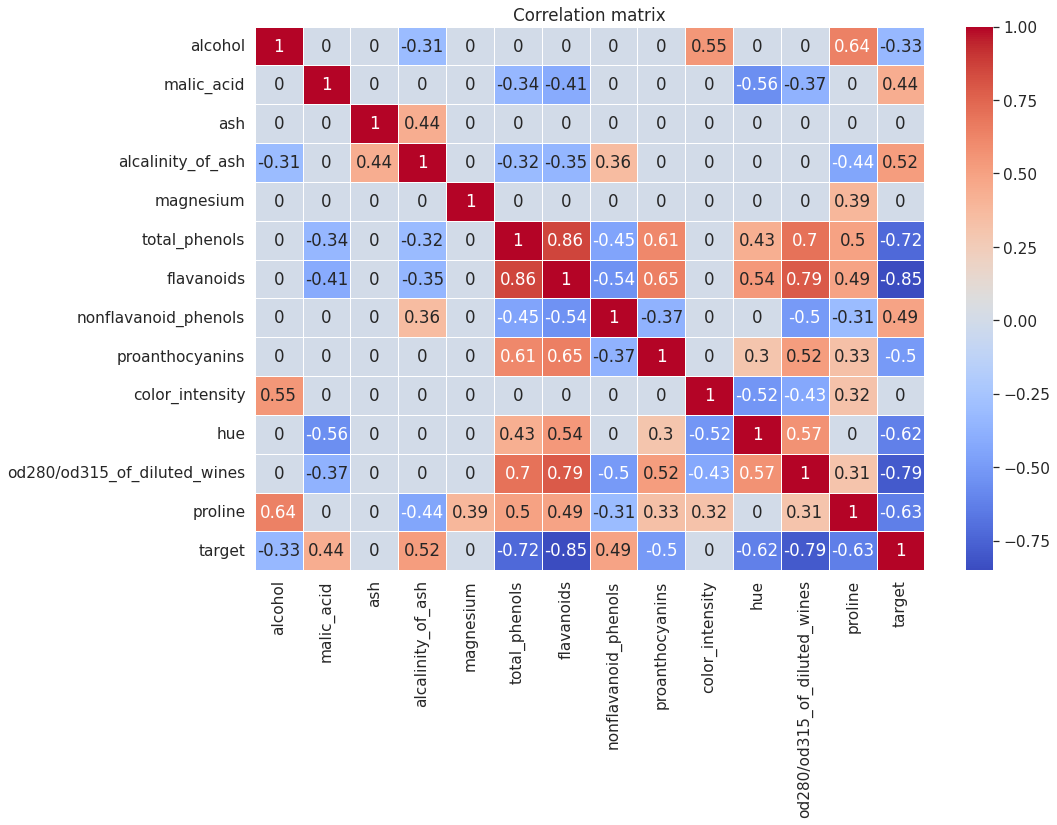

In [288]:
import seaborn as sns

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = X.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

<font color="red">Интерпретация: имеется достаточно сильная отрицательная связь целевой переменной target и параметров: total_phenols, flavanoids, hue, od280/od315_of_dilutes_wines, proline</font>

<font color="red">Имеется сильная линейная связь между параметрами (все значения по модулю больше 0.5). Это плохо, это значит, что либо от части параметров нужно отказаться, либо их каким-то образом объединить, либо имеется влияние "третьей переменной"</font>

9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [309]:
high_corr = corr_matrix["target"].drop('target')
high_corr = high_corr[np.abs(high_corr)>0.5].index
high_corr = list(high_corr)
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [326]:
X_1 = X.copy()

In [327]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float32
 1   malic_acid                    178 non-null    float32
 2   ash                           178 non-null    float32
 3   alcalinity_of_ash             178 non-null    float32
 4   magnesium                     178 non-null    float32
 5   total_phenols                 178 non-null    float32
 6   flavanoids                    178 non-null    float32
 7   nonflavanoid_phenols          178 non-null    float32
 8   proanthocyanins               178 non-null    float32
 9   color_intensity               178 non-null    float32
 10  hue                           178 non-null    float32
 11  od280/od315_of_diluted_wines  178 non-null    float32
 12  proline                       178 non-null    float32
 13  targe

In [328]:
X_1.drop('target', axis=1, inplace=True)
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float32
 1   malic_acid                    178 non-null    float32
 2   ash                           178 non-null    float32
 3   alcalinity_of_ash             178 non-null    float32
 4   magnesium                     178 non-null    float32
 5   total_phenols                 178 non-null    float32
 6   flavanoids                    178 non-null    float32
 7   nonflavanoid_phenols          178 non-null    float32
 8   proanthocyanins               178 non-null    float32
 9   color_intensity               178 non-null    float32
 10  hue                           178 non-null    float32
 11  od280/od315_of_diluted_wines  178 non-null    float32
 12  proline                       178 non-null    float32
dtypes: fl

In [329]:
X_1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [335]:
X_1[[el + "_2" for el in high_corr]] = np.power(X_1[high_corr], 2)

In [336]:
X_1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.360016,7.840000,9.3636,1.0816,15.366401,1134225.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.439995,7.022501,7.6176,1.1025,11.560000,1102500.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.960022,7.840000,10.4976,1.0609,10.048901,1404225.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.239960,14.822499,12.1801,0.7396,11.902500,2190400.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.000000,7.840000,7.2361,1.0816,8.584901,540225.0
